In [128]:
import dotenv
import os

ROOT = os.path.dirname(dotenv.find_dotenv())

In [2]:
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from datetime import datetime


def search_semantic_scholar(query):
    """
    Search Semantic Scholar API for all papers matching the query
    """
    base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
    all_papers = []
    offset = 0
    limit = 100

    with tqdm(desc="Fetching papers", unit="batch") as pbar:
        while True:
            params = {
                "query": query,
                "fields": "title,publicationDate,citationCount,url",
                "limit": limit,
                "offset": offset,
            }

            response = requests.get(base_url, params=params)

            if response.status_code != 200:
                print(f"Error: {response.status_code}")
                break

            data = response.json()
            batch_papers = data.get("data", [])
            all_papers.extend(batch_papers)

            pbar.update(1)

            # Break if no more results
            if len(batch_papers) < limit:
                break

            offset += limit

    print(f"Total papers found: {len(all_papers)}")
    return all_papers


def create_scatter_plot(papers):
    """
    Create a scatter plot of publication date vs. citation count
    """
    # Filter and process papers
    valid_papers = []
    for paper in papers:
        try:
            pub_date = datetime.fromisoformat(
                paper.get("publicationDate", "").rstrip("Z")
            )
            if pub_date and paper.get("citationCount") is not None:
                valid_papers.append(
                    {
                        "date": pub_date,
                        "citations": paper["citationCount"],
                        "title": paper["title"],
                    }
                )
        except (ValueError, TypeError, AttributeError):
            continue

    # Prepare data for plotting
    dates = [paper["date"] for paper in valid_papers]
    citations = [paper["citations"] for paper in valid_papers]
    titles = [paper["title"] for paper in valid_papers]

    # Create the plot
    plt.figure(figsize=(15, 8))
    scatter = plt.scatter(dates, citations, alpha=0.7, c=citations, cmap="viridis")
    plt.colorbar(scatter, label="Citation Count")

    # Annotate points with titles
    for i, title in enumerate(titles):
        plt.annotate(
            title,
            (dates[i], citations[i]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=8,
            alpha=0.7,
        )

    plt.title('"Is All You Need" Paper Analysis')
    plt.xlabel("Publication Date")
    plt.ylabel("Citation Count")
    plt.xticks(rotation=45)
    plt.tight_layout()

    # Save the plot
    plt.savefig("is_all_you_need_papers.png", dpi=300, bbox_inches="tight")

    return valid_papers


# Main execution
query = '"is all you need"'
papers = search_semantic_scholar(query)


# Create scatter plot
analyzed_papers = create_scatter_plot(papers)

Fetching papers: 10batch [00:11,  1.19s/batch]

Error: 400
Total papers found: 1000


AttributeError: 'NoneType' object has no attribute 'rstrip'

[{'date': datetime.datetime(2017, 6, 12, 0, 0),
  'citations': 114406,
  'title': 'Attention is All you Need'},
 {'date': datetime.datetime(2018, 2, 16, 0, 0),
  'citations': 999,
  'title': 'Diversity is All You Need: Learning Skills without a Reward Function'},
 {'date': datetime.datetime(2020, 8, 23, 0, 0),
  'citations': 652,
  'title': 'A Lip Sync Expert Is All You Need for Speech to Lip Generation In the Wild'},
 {'date': datetime.datetime(2020, 4, 28, 0, 0),
  'citations': 715,
  'title': 'Image Augmentation Is All You Need: Regularizing Deep Reinforcement Learning from Pixels'},
 {'date': datetime.datetime(2020, 3, 25, 0, 0),
  'citations': 832,
  'title': 'Rethinking Few-Shot Image Classification: a Good Embedding Is All You Need?'},
 {'date': datetime.datetime(2024, 11, 4, 0, 0),
  'citations': 62,
  'title': 'Protein generation with evolutionary diffusion: sequence is all you need'},
 {'date': datetime.datetime(2024, 9, 27, 0, 0),
  'citations': 44,
  'title': 'Emu3: Next-To

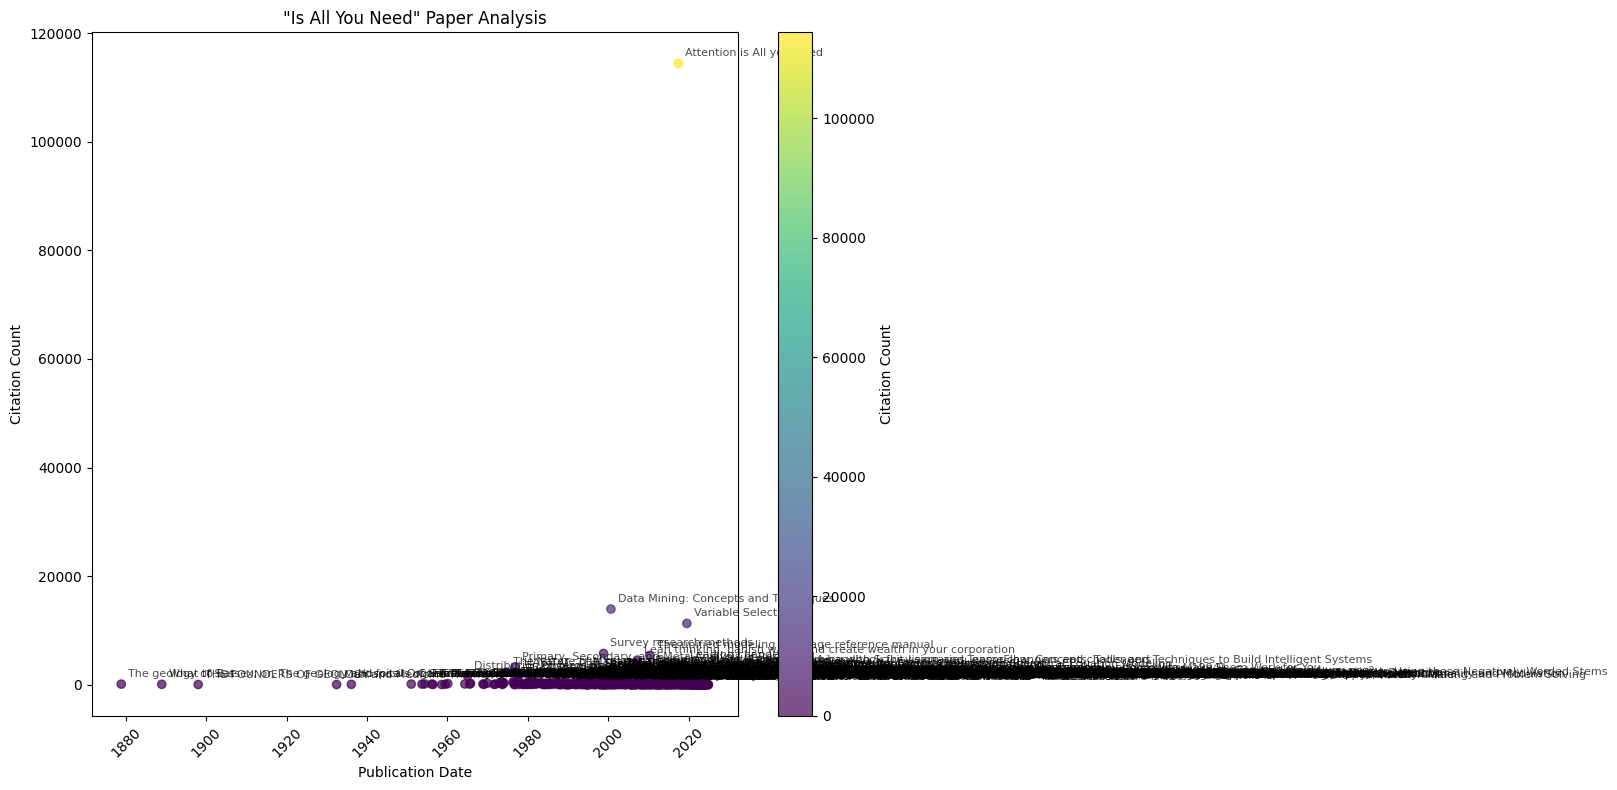

In [5]:
create_scatter_plot(papers)

In [12]:
import requests
import matplotlib.pyplot as plt
from tqdm import tqdm
from datetime import datetime
import time


def search_semantic_scholar(query: str, year: int, field_of_study: str) -> list:
    """
    Search Semantic Scholar API for papers in a specific year and field
    """
    base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
    all_papers = []
    offset = 0
    limit = 100

    with tqdm(desc=f"Fetching papers for {year}", unit="batch") as pbar:
        while True:
            params = {
                "query": query,
                "fields": "title,publicationDate,citationCount,url,year",
                "limit": limit,
                "offset": offset,
                "year": str(year),
                "fieldsOfStudy": field_of_study,
            }
            while True:
                response = requests.get(base_url, params=params)

                if response.status_code == 429:
                    time.sleep(10)
                    continue

                if response.status_code != 200:
                    break

                break

            if response.status_code != 200:
                break

            data = response.json()
            batch_papers = data.get("data", [])

            all_papers.extend(batch_papers)
            pbar.update(len(batch_papers))
            pbar.set_description(f"Year {year}: {len(all_papers)} papers")

            if len(batch_papers) < limit:
                break

            offset += limit
    return all_papers


def create_scatter_plot(all_years_papers):
    """
    Create scatter plot across multiple years
    """
    valid_papers = []
    for papers in all_years_papers:
        for paper in papers:
            try:
                pub_date = datetime.fromisoformat(
                    paper.get("publicationDate", "").rstrip("Z")
                )
                if pub_date and paper.get("citationCount") is not None:
                    valid_papers.append(
                        {
                            "date": pub_date,
                            "citations": paper["citationCount"],
                            "title": paper["title"],
                        }
                    )
            except (ValueError, TypeError, AttributeError):
                continue

    dates = [paper["date"] for paper in valid_papers]
    citations = [paper["citations"] for paper in valid_papers]

    plt.figure(figsize=(15, 8))
    scatter = plt.scatter(dates, citations, alpha=0.7, c=citations, cmap="viridis")
    plt.colorbar(scatter, label="Citation Count")
    plt.title('"Is All You Need" Paper Analysis')
    plt.xlabel("Publication Date")
    plt.ylabel("Citation Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("is_all_you_need_papers.png", dpi=300, bbox_inches="tight")

    return valid_papers


# Main execution
query = '"is all you need"'
field_of_study = "Computer Science"
# Search for papers by year
years = range(2010, 2026)
all_years_papers = [
    search_semantic_scholar(query, year, field_of_study) for year in years
]

# Create scatter plot
analyzed_papers = create_scatter_plot(all_years_papers)
print(f"Total analyzed papers: {len(analyzed_papers)}")

Year 2010: 723 papers: : 723batch [00:08, 83.64batch/s] 
Year 2011: 634 papers: : 634batch [00:08, 75.87batch/s] 
Year 2012: 742 papers: : 742batch [00:09, 77.78batch/s]  
Year 2013: 781 papers: : 781batch [00:11, 70.74batch/s] 
Year 2014: 757 papers: : 757batch [00:11, 66.53batch/s] 
Year 2015: 732 papers: : 732batch [00:11, 64.42batch/s] 
Year 2016: 695 papers: : 695batch [00:08, 79.45batch/s] 
Year 2017: 522 papers: : 522batch [00:06, 76.66batch/s] 
Year 2018: 566 papers: : 566batch [00:07, 72.70batch/s] 
Year 2019: 562 papers: : 562batch [00:07, 70.42batch/s]  
Year 2020: 466 papers: : 466batch [00:05, 88.61batch/s] 
Year 2021: 479 papers: : 479batch [00:04, 107.47batch/s] 
Year 2022: 460 papers: : 460batch [00:05, 81.24batch/s] 
Year 2023: 527 papers: : 527batch [00:05, 94.60batch/s] 


AttributeError: 'NoneType' object has no attribute 'rstrip'

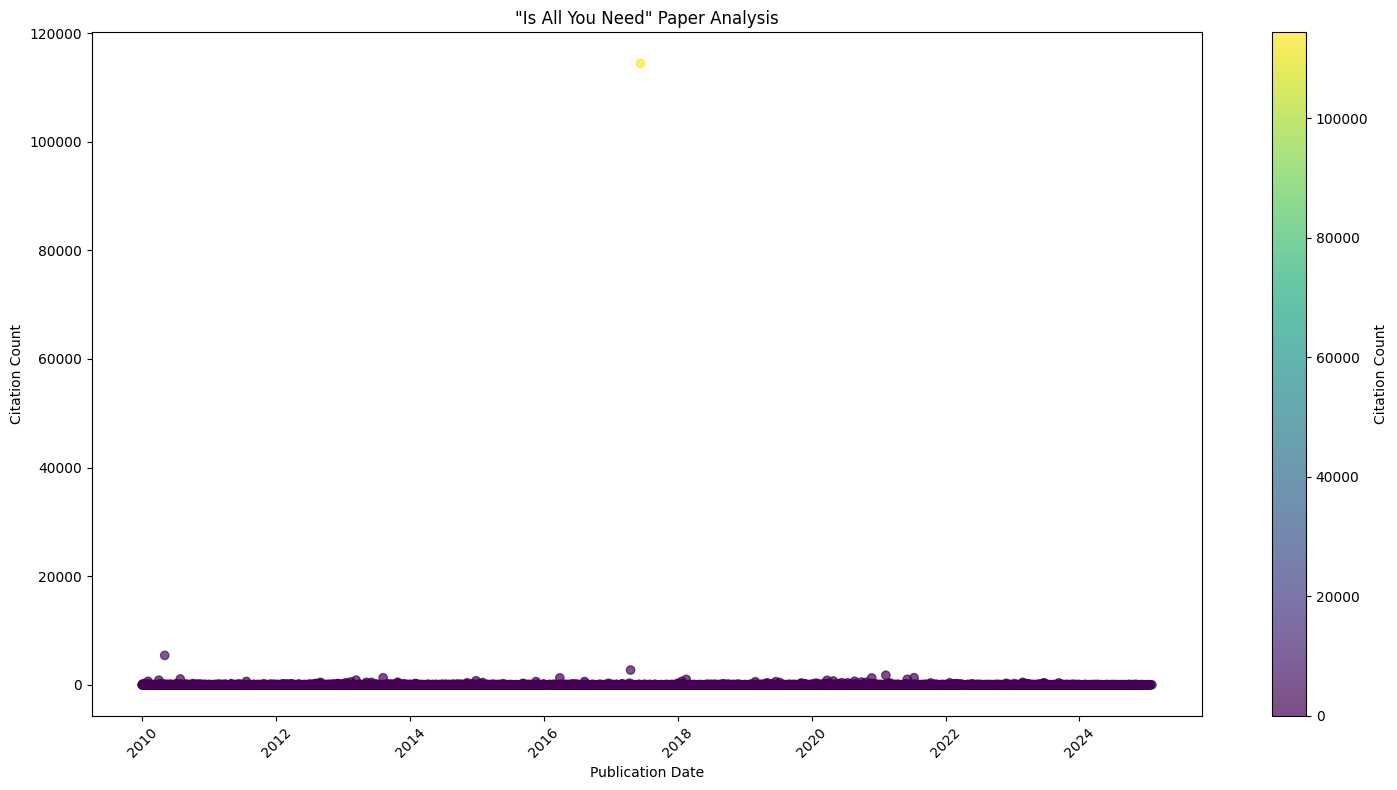

In [17]:
"""
Create scatter plot across multiple years
"""
valid_papers = []
for papers in all_years_papers:
    for paper in papers:
        try:
            pub_date = datetime.fromisoformat(
                paper.get("publicationDate", "").rstrip("Z")
            )
            if pub_date and paper.get("citationCount") is not None:
                valid_papers.append(
                    {
                        "date": pub_date,
                        "citations": paper["citationCount"],
                        "title": paper["title"],
                    }
                )
        except (ValueError, TypeError, AttributeError):
            continue

dates = [paper["date"] for paper in valid_papers]
citations = [paper["citations"] for paper in valid_papers]

plt.figure(figsize=(15, 8))
scatter = plt.scatter(dates, citations, alpha=0.7, c=citations, cmap="viridis")
plt.colorbar(scatter, label="Citation Count")
plt.title('"Is All You Need" Paper Analysis')
plt.xlabel("Publication Date")
plt.ylabel("Citation Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("is_all_you_need_papers.png", dpi=300, bbox_inches="tight")

In [32]:
# Option 2
from itertools import chain

flattened_papers = list(chain(*all_years_papers))

In [37]:
import pandas as pd
import re

df = pd.DataFrame(flattened_papers)
df = df[
    df.title.apply(
        lambda x: re.match(".*(is|are) all you need.*", x, re.IGNORECASE) is not None
    )
]


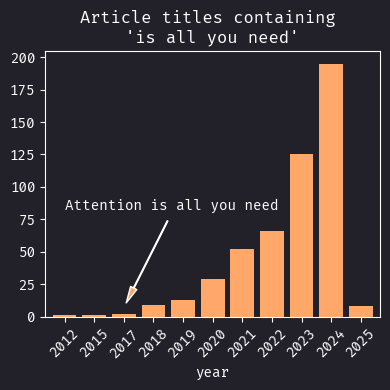

In [145]:
fig, ax = plt.subplots(figsize=(4, 4))
plt.style.use(f"{ROOT}/orange_dark.mplstyle")

df = df[~df.publicationDate.str[:4].isnull()]
df["year"] = df.publicationDate.str[:4].astype(int)
plot_data = df.groupby("year", as_index=False).count()
plot_data.plot.bar(x="year", y="citationCount", ax=ax, width=0.8)
ax.legend().remove()
plt.xticks(rotation=45)

# Add annotation
year_2017_idx = plot_data[plot_data.year == 2017].index[0]
count_2017 = plot_data[plot_data.year == 2017].citationCount.values[0]
ax.annotate(
    "Attention is all you need",
    xy=(year_2017_idx, count_2017 + 5),  # point to annotate
    xytext=(year_2017_idx - 2, count_2017 + 80),  # text position
    arrowprops=dict(
        # facecolor="black",
        shrink=0.05,
        width=0.5,  # width of arrow
        headwidth=5,  # width of arrow head
    ),  # arrow properties
)
ax.set_title("Article titles containing \n'is all you need'")
plt.tight_layout()
plt.savefig("image.svg", format="svg")

In [147]:
df.sort_values("citationCount", ascending=False)


,paperId,url,title,citationCount,publicationDate,year
5064,204e3073870fae3d05bcbc2f6a8e263d9b72e776,https://www.semanticscholar.org/paper/204e3073...,Attention is All you Need,114406,2017-06-12,2017
5586,5b01eaef54a653ba03ddd5a978690380fbc19bfc,https://www.semanticscholar.org/paper/5b01eaef...,Diversity is All You Need: Learning Skills wit...,999,2018-02-16,2018
6716,80455126562cfe6a483e02b3446a3f30b8e9f229,https://www.semanticscholar.org/paper/80455126...,Rethinking Few-Shot Image Classification: a Go...,832,2020-03-25,2020
6715,6568423cfaca7e24c88ea208cb0e67129e43aa9b,https://www.semanticscholar.org/paper/6568423c...,Image Augmentation Is All You Need: Regularizi...,715,2020-04-28,2020
6714,9c160a71d3265eedaf7645c39be073c966f10433,https://www.semanticscholar.org/paper/9c160a71...,A Lip Sync Expert Is All You Need for Speech t...,652,2020-08-23,2020
...,...,...,...,...,...,...
8739,2ddcba714235b50c43f4a1eb308727ea0905b48c,https://www.semanticscholar.org/paper/2ddcba71...,Design of Experiment Is All You Need: Utilizin...,0,2024-08-09,2024
8740,285d366a98bb742e0eafd7457d3e2f7f28d9ea41,https://www.semanticscholar.org/paper/285d366a...,Accelerating Look-ahead in Bayesian Optimizati...,0,2024-02-03,2024
8741,5563170442fc7a588a9af3a489813138c796bda9,https://www.semanticscholar.org/paper/55631704...,"One Model is All You Need: ByT5-Sanskrit, a Un...",0,2024-09-20,2024
8742,d4b1b1c013b772f54d91cf42aae73c8c0b97d499,https://www.semanticscholar.org/paper/d4b1b1c0...,Lexicalization Is All You Need: Examining the ...,0,2024-11-06,2024


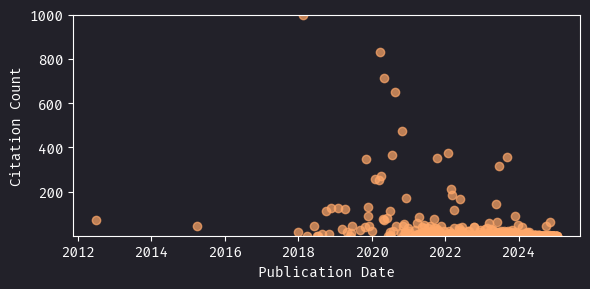

In [176]:
fig, ax = plt.subplots(figsize=(6, 3))

plt.scatter(pd.to_datetime(df.publicationDate), df.citationCount, alpha=0.7)
plt.ylim(1, 1000)
plt.xlabel("Publication Date")
plt.ylabel("Citation Count")
plt.tight_layout()
plt.savefig("image3.svg", format="svg")
# plt.yscale("log")

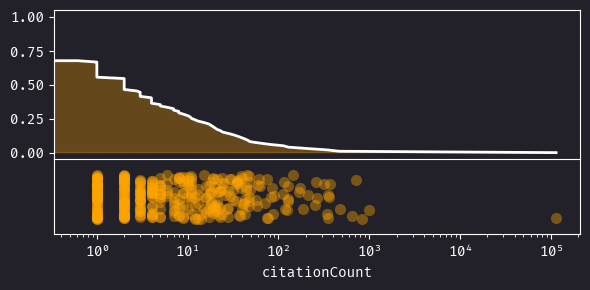

In [193]:
# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(6, 3), gridspec_kw={"hspace": 0, "height_ratios": [2, 1]}
)
plt.style.use(f"{ROOT}/orange_dark.mplstyle")

# Top subplot: Quantile function
quantiles = np.linspace(0, 1, 100)
citation_quantiles = np.percentile(df["citationCount"], quantiles * 100)
ax1.plot(citation_quantiles, 1 - quantiles, color="white", linewidth=2)
ax1.fill_betweenx(1 - quantiles, 0, citation_quantiles, alpha=0.3, color="orange")
ax1.set_xscale("log")
# ax1.set_ylabel("Quantile")
ax1.spines["bottom"].set_visible(False)

# Bottom subplot: Strip plot
sns.stripplot(
    data=df, x="citationCount", ax=ax2, alpha=0.4, size=8, jitter=0.3, color="orange"
)
ax2.set_xscale("log")
ax2.set_yticks([])
# ax2.spines["top"].set_visible(False)

# Share the x-axis
ax2.sharex(ax1)
plt.tight_layout()
plt.savefig("image4.svg", format="svg")

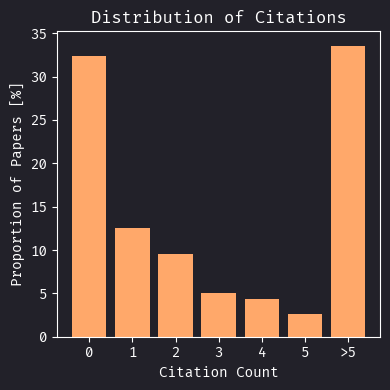

In [144]:
import numpy as np

plt.style.use(f"{ROOT}/orange_dark.mplstyle")
# Calculate proportions for each citation count
proportions = df["citationCount"].value_counts() / len(df)

# Create specific buckets
buckets = {
    "0": (proportions[0] if 0 in proportions else 0),
    "1": (proportions[1] if 1 in proportions else 0),
    "2": (proportions[2] if 2 in proportions else 0),
    "3": (proportions[3] if 3 in proportions else 0),
    "4": (proportions[4] if 4 in proportions else 0),
    "5": (proportions[5] if 5 in proportions else 0),
    ">5": sum(proportions[i] for i in proportions.index if i > 5),
}

# Create bar plot
plt.figure(figsize=(4, 4))
plt.bar(buckets.keys(), 100 * np.array(list(buckets.values())))
plt.title("Distribution of Citations")
plt.ylabel("Proportion of Papers [%]")
plt.xlabel("Citation Count")
plt.tight_layout()
plt.savefig("image2.svg", format="svg")

In [140]:
dark_style = plt.style.library["dark_background"]

# Print color-related settings
for key, value in dark_style.items():
    if "color" in key:
        print(f"{key}: {value}")

axes.edgecolor: white
axes.facecolor: black
axes.labelcolor: white
boxplot.boxprops.color: white
boxplot.capprops.color: white
boxplot.flierprops.color: white
boxplot.flierprops.markeredgecolor: white
boxplot.whiskerprops.color: white
figure.edgecolor: black
figure.facecolor: black
grid.color: white
lines.color: white
patch.edgecolor: white
text.color: white
xtick.color: white
ytick.color: white


In [137]:
import matplotlib.font_manager as fm

available_fonts = [f.name for f in fm.fontManager.ttflist]
[name for name in available_fonts if "fira" in name.lower()]

['FiraCode Nerd Font']

In [135]:
possible_paths = [
    "/Library/Fonts/FiraCode-Regular.ttf",
    "/System/Library/Fonts/FiraCode-Regular.ttf",
    os.path.expanduser("~/Library/Fonts/FiraCode-Regular.ttf"),
    # Add more paths if needed
]

# Print found font files
print("Checking common font locations:")
for path in possible_paths:
    if os.path.exists(path):
        print(f"Found: {path}")

# Rebuild the font cache
fm.fontManager.addfont(
    "/Users/mac-robertsocolewicz/Library/Fonts/FiraCodeNerdFont-Regular.ttf"
)  # Adjust path based on output above
fm._load_fontmanager(try_read_cache=False)

Checking common font locations:


Matplotlib is building the font cache; this may take a moment.


In [122]:
import matplotlib

print(matplotlib.get_configdir())

/Users/mac-robertsocolewicz/.matplotlib


In [43]:
base_url = "https://api.semanticscholar.org/graph/v1/paper/search"
query = '"is all you need"'
params = {
    "query": query,
    "fields": "title,publicationDate,citationCount,url,fieldsOfStudy,year",
    "limit": 1,
    "offset": 0,
    "year": str(2024),
    "fieldsOfStudy": field_of_study,
}
response = requests.get(base_url, params=params)
response.json()

{'total': 488,
 'offset': 0,
 'next': 1,
 'data': [{'paperId': 'f0f0b680ac74960922634e3da5cf1e6f6883c840',
   'url': 'https://www.semanticscholar.org/paper/f0f0b680ac74960922634e3da5cf1e6f6883c840',
   'title': 'Protein generation with evolutionary diffusion: sequence is all you need',
   'year': 2024,
   'citationCount': 62,
   'fieldsOfStudy': ['Biology'],
   'publicationDate': '2024-11-04'}]}

In [14]:
years = range(2024, 2026)
delta = [search_semantic_scholar(query, year, field_of_study) for year in years]

Year 2024: 488 papers: : 488batch [00:04, 101.61batch/s]
Year 2025: 23 papers: : 23batch [00:00, 31.93batch/s]  


In [16]:
all_years_papers.extend(delta)